# Ensemble Machine Learning with Wine


Name: Gabriel Richards

Date: 10 Apr 2025

Introduction:

## 0. Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    BaggingClassifier,
    VotingClassifier,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

We're going to be using pandas and numpy to perform our basic statistics and data frame handling, matplotlib and seaborn for data plotting, and sklearn for training our models.

## 1. Load & Inspect Data

In [2]:
# Load the dataset
wine_data = pd.read_csv('winequality-red.csv', sep=';')

# Get information about the dataset structure
print("Dataset Information:")
wine_data.info()

# Check the shape of the dataset
print("\nDataset shape (rows, columns):")
print(wine_data.shape)


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Dataset shape (rows, columns):
(1599, 12)


Our dataset has 1599 entries/rows with 12 total columns (also called features), all of which are numeric and none of which are categorical. 

### Dataset Dictionary

Here is a brief description of what each column or feature represents.

#### Wine Quality Features:

- **Fixed Acidity**: Primary acids in wine (mainly tartaric acid) that don't evaporate readily; contributes to structure and aging potential.
- **Volatile Acidity**: Primarily acetic acid that can evaporate; at high levels creates vinegar-like off-flavors.
- **Citric Acid**: Adds freshness and flavor to wines; found in small quantities and contributes to the wine's acidity profile.
- **Residual Sugar**: Amount of sugar remaining after fermentation stops; influences sweetness.
- **Chlorides**: Amount of salt in the wine; high levels can give a salty taste.
- **Free Sulfur Dioxide**: Unbound form of SO₂ that prevents microbial growth and oxidation.
- **Total Sulfur Dioxide**: Sum of free and bound SO₂; high levels can cause off-odors and allergic reactions.
- **Density**: Ratio of mass to volume, influenced by alcohol and sugar content; typically slightly less than water.
- **pH**: Measure of acidity on a 0-14 scale; wines typically range from 3-4 with lower values indicating acidity.
- **Sulphates**: Additive that acts as an antimicrobial and antioxidant.
- **Alcohol**: Percentage of alcohol by volume
- **Quality**: Sensory score between 0 and 10, measuring human-evaluated quality of the wine.

Let's look a little closer at what the data actually looks like.

In [3]:
# View the first few rows
print("\nFirst 5 rows of the dataset:")
print(wine_data.head())




First 5 rows of the dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8  

The data looks well formatted and easy to read.

In [4]:
# Get statistical summary of numerical features
print("\nStatistical summary of features:")
print(wine_data.describe())





Statistical summary of features:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.01

All columns have the same count, which is reassuring as we look ahead to data cleaning. Different features varied widely, with Density remaining very close to 1 but 

## 2. Prepare the Data
Includes cleaning, feature engineering, encoding, splitting, helper functions


### 2.1 Data Cleaning & Prep

First let's clean the dataset to confirm there are no issues with it.

In [5]:
# Check for missing values
print("\nMissing values in each column:")
print(wine_data.isnull().sum())


Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Fortunately, this data set comes clean as a whistle and has no missing, null, or visibly corrupted values.

### 2.2 Feature Engineering

#### 2.2.1 Data Probing

Let's look a little closer at the data to see how it's distributed and determine good options for our ensemble models.

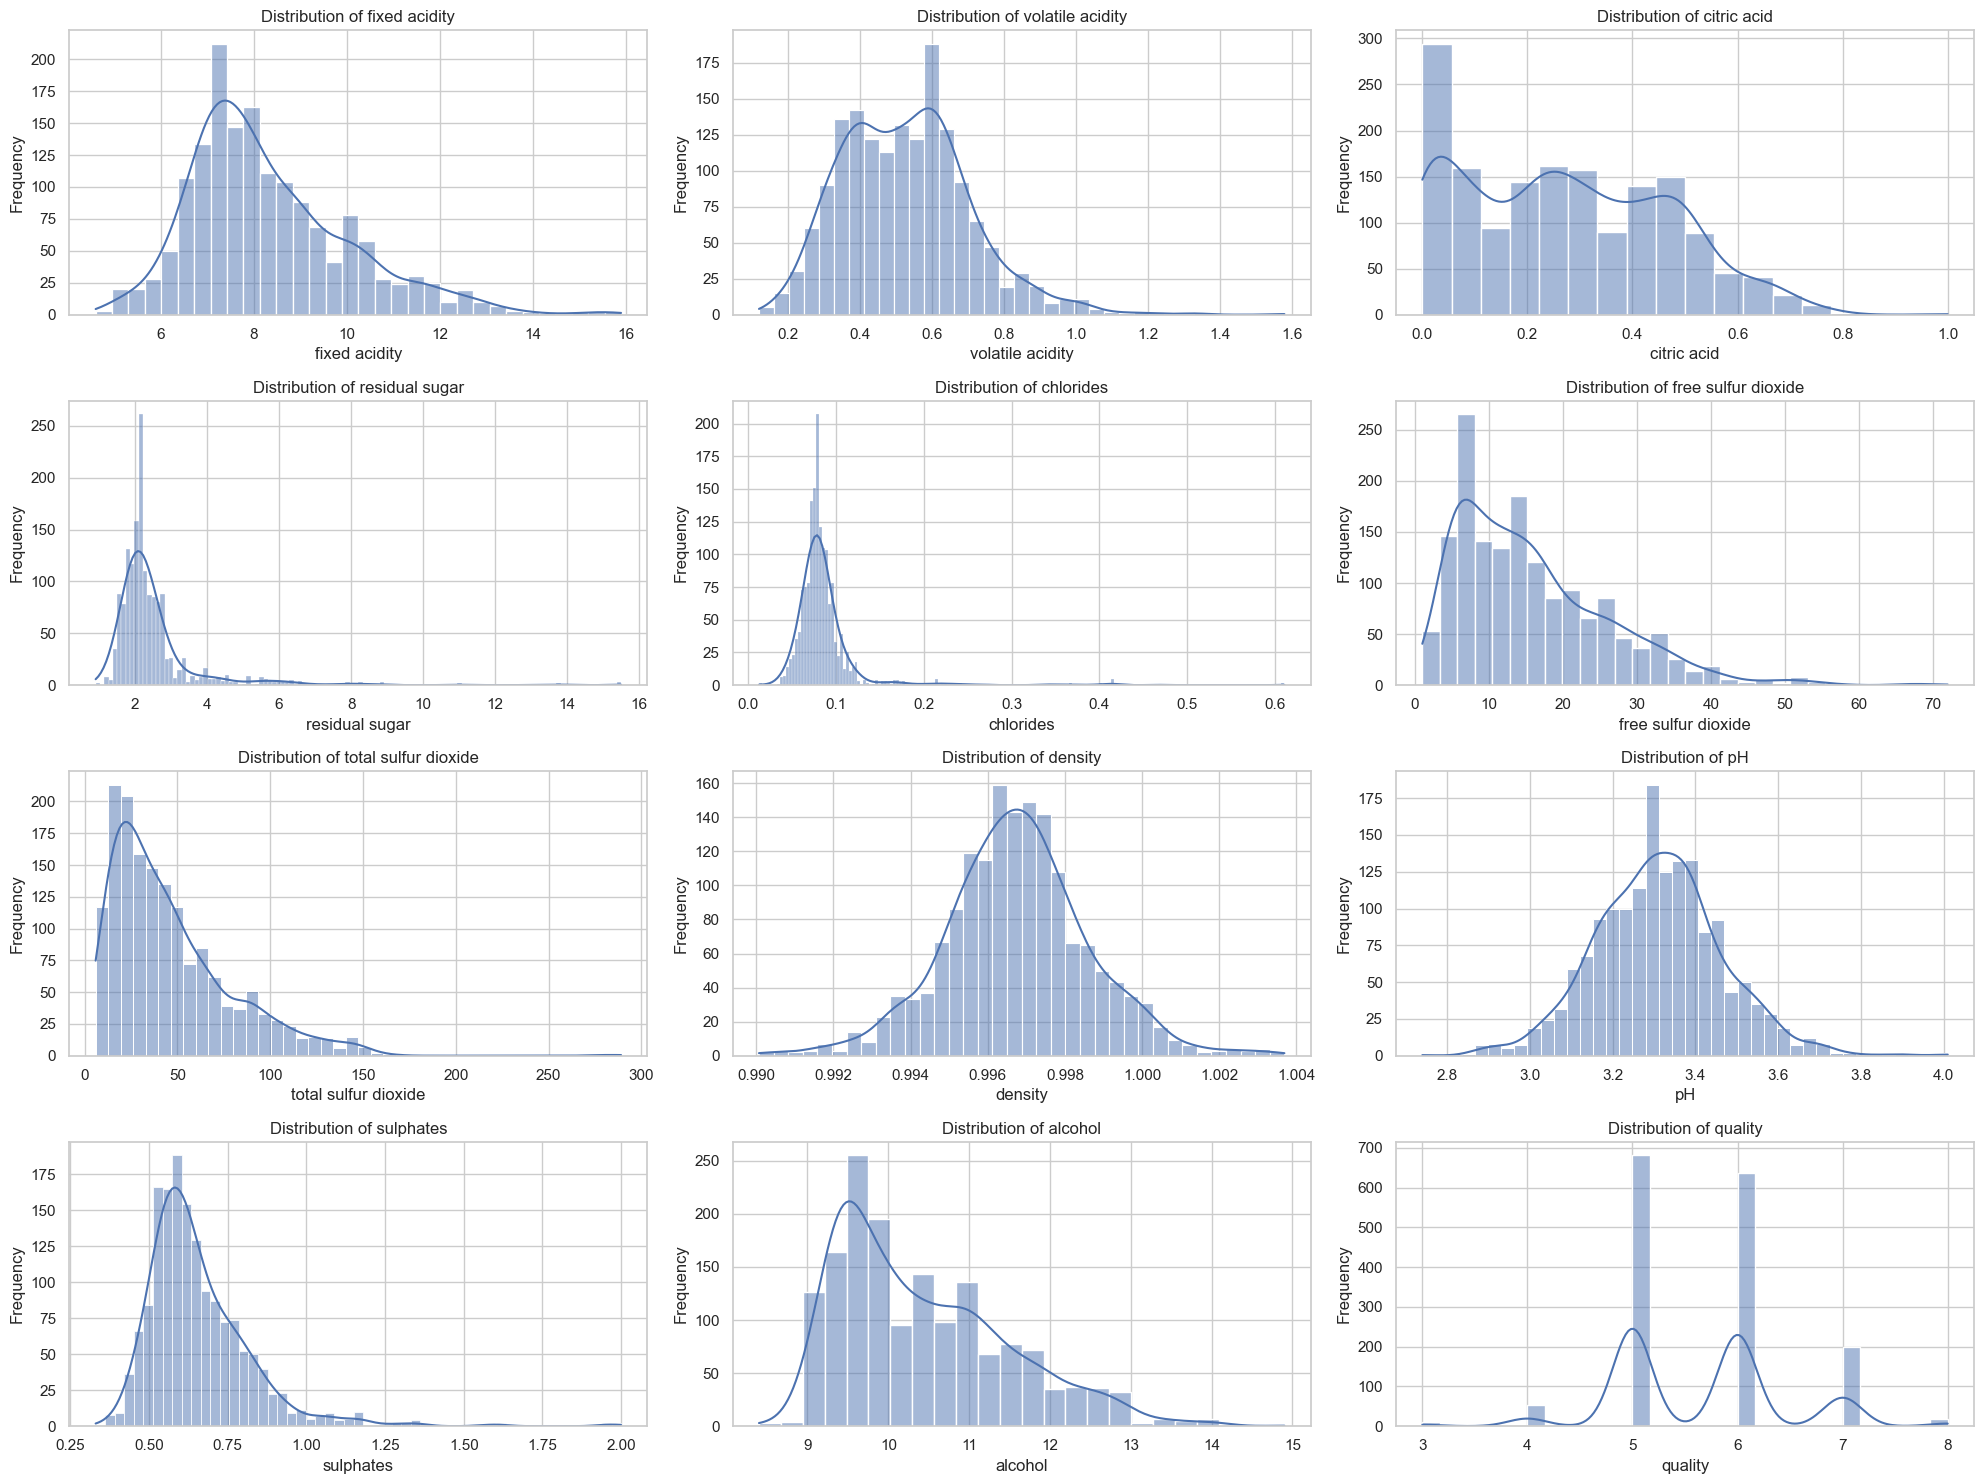

In [6]:
# Set the style for our plots
sns.set(style="whitegrid")



# Create histograms for each feature
feature_names = wine_data.columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(feature_names):
    plt.subplot(4, 3, i+1)
    sns.histplot(wine_data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

This shows us all of the features in the data set generally follow a bell curve, although some are right skewed or left skewed.

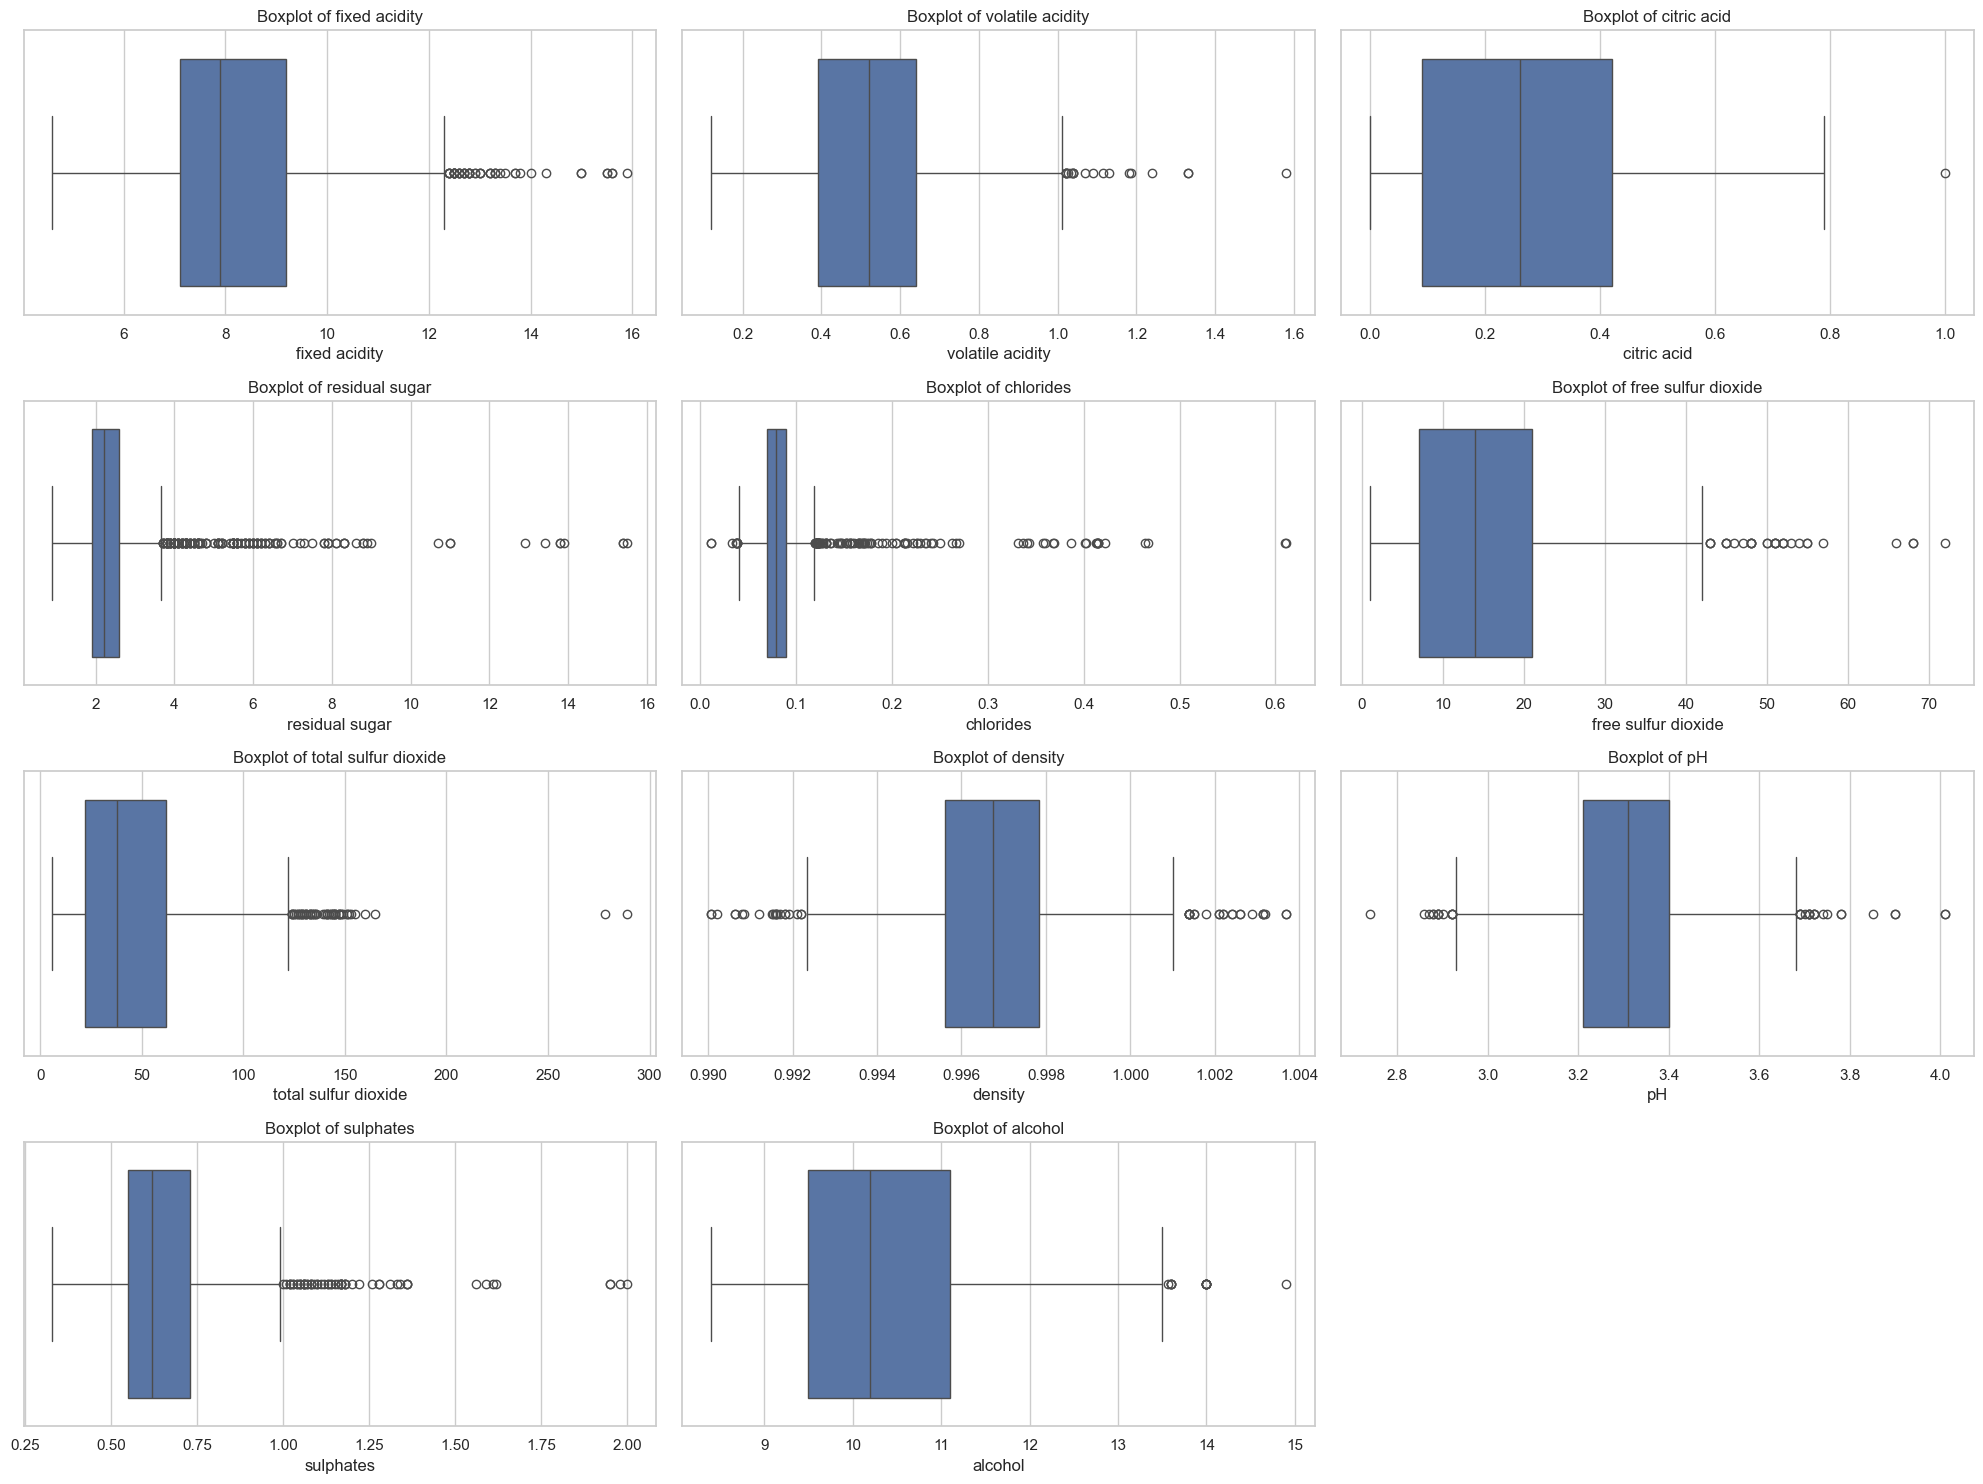

In [7]:
# Create boxplots for each feature
plt.figure(figsize=(20, 15))
for i, feature in enumerate(wine_data.columns[:-1]):  # Exclude 'quality' for boxplots
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=wine_data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

These box plots (short for 'box and whisker, referring to the blue box and two verticle lines) help us grasp variance across the columns.

A boxplot visually summarizes data distribution, with the box representing the middle 50% of values and the line inside showing the median. 
The whiskers (horizontal lines extending from the box) reach to the smallest and largest typical values, while circles mark unusual outliers. 

Boxplots make it easy to quickly compare distributions across different features, showing where most values cluster and highlighting any extreme values. 
When examining these wine quality plots, you can immediately see which features have wide or narrow ranges (citric acid is wide; sulphates is narrow), and which have many outliers.

Looking at them we can see that items like Citric Acid never land on a specific value across the set, whereas others like sulphates might have a strong core of typical values to establish a median (the blue box) but also have a high number of outliers (the little circles).

Let's now proceed to see how they correlate to one another. How closely is one rising or falling in value associated with each other feature?

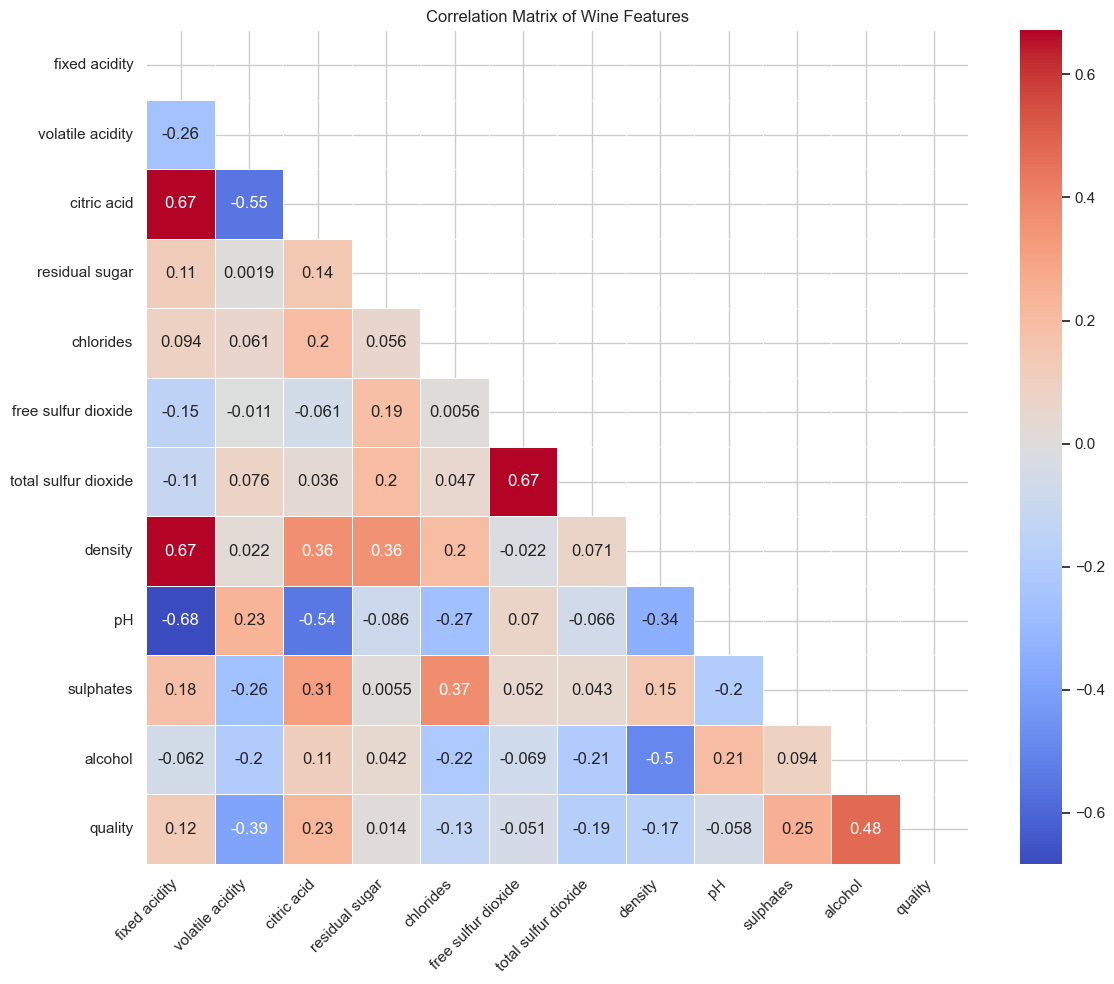

In [8]:
# Create a correlation matrix showing only the lower triangle
plt.figure(figsize=(12, 10))
correlation_matrix = wine_data.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Apply the mask to the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)
plt.title('Correlation Matrix of Wine Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

We can see a handful of pretty intuitive correlations, like those between citric acid and fixed. From the quality-alcohol correlation of 0.48 - quality's highest correlation - people seem to enjoy higher alcohol-by-volume wines, with their quality generally being ranked higher.

There are some other more surprising ones - like fixed acidity's correlation with density.

There are also some interesting absences of correlation. Volatile acidity and fixed acidity have a relatively weak correlation at -0.26 for two traits which share a noun. The same is true for Sulphates and both free and total sulfur dioxide, with correlations of 0.05 and 0.04 respectively.

For our research, the bottom most row 'quality' is of greatest interest. Let's break it out and look at this a little closer.

#### 2.2.2 Correlation with Quality

In [9]:
quality_correlation = correlation_matrix['quality'].sort_values(ascending=False)
print("\nFeatures sorted by correlation with quality:")
print(quality_correlation)


Features sorted by correlation with quality:
quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


Since we are going to be training ensemble models to predict quality, if we aim for it to be accurate we will be looking for extremities - those with very high or very low correlation. 

For this reason, it would be wise to avoid including residual sugar, free sulphur dioxide, and pH in our analysis as their correlations with quality were near zero. 

Volatile acidity and alcohol ranked highest with correlations of -0.39 and 0.48 respectively.

<Figure size 1200x1000 with 0 Axes>

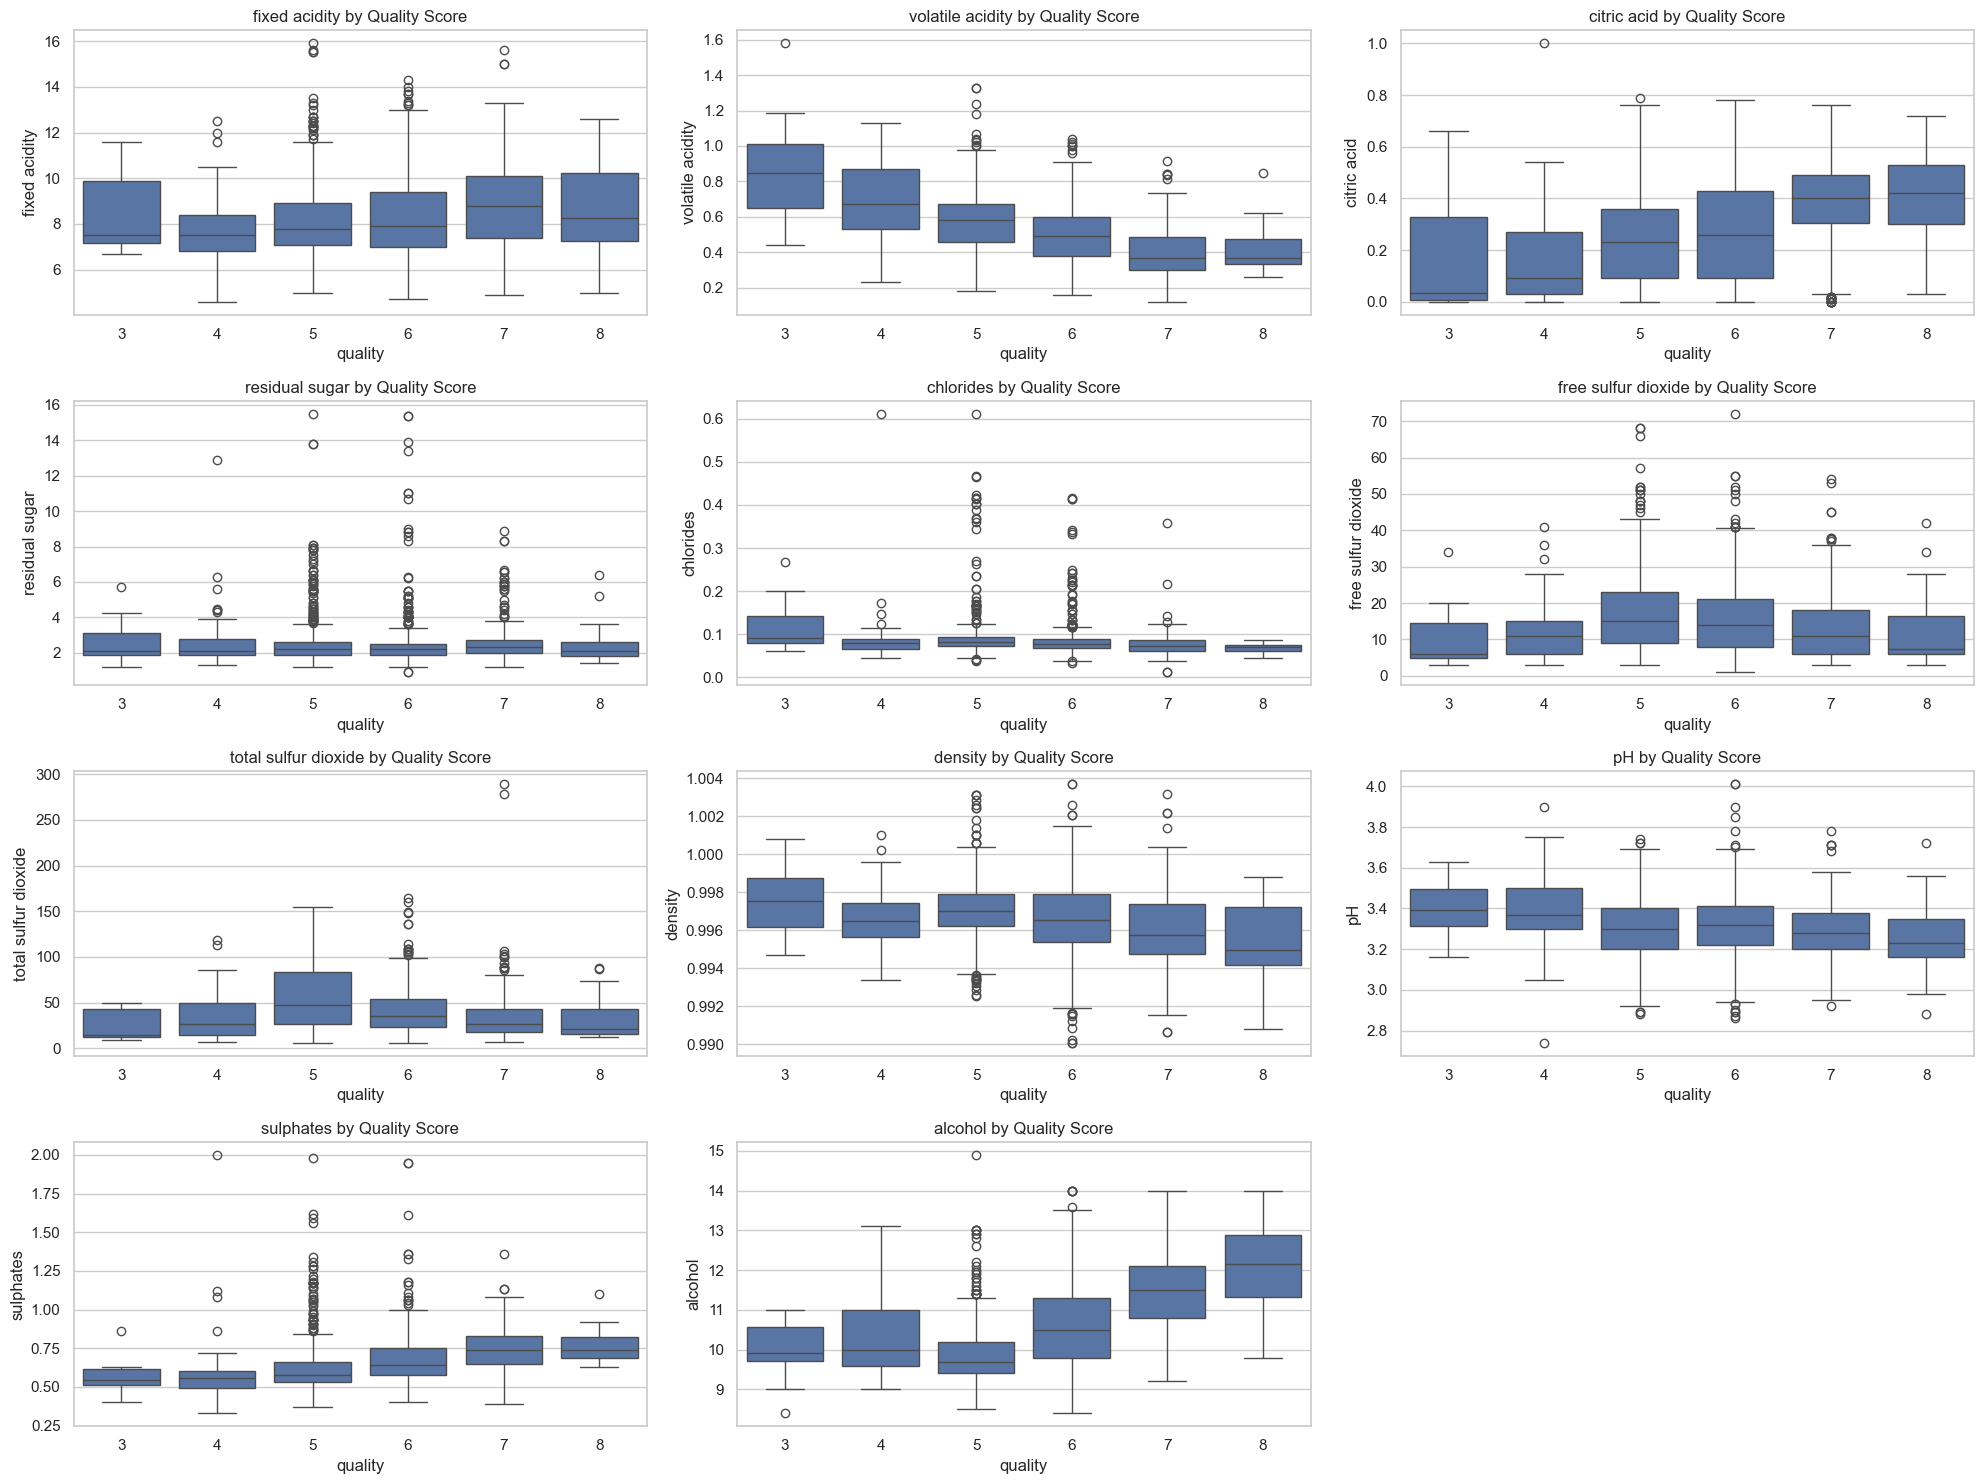


Average feature values by quality score:
         fixed acidity  volatile acidity  citric acid  residual sugar  \
quality                                                                 
3             8.360000          0.884500     0.171000        2.635000   
4             7.779245          0.693962     0.174151        2.694340   
5             8.167254          0.577041     0.243686        2.528855   
6             8.347179          0.497484     0.273824        2.477194   
7             8.872362          0.403920     0.375176        2.720603   
8             8.566667          0.423333     0.391111        2.577778   

         chlorides  free sulfur dioxide  total sulfur dioxide   density  \
quality                                                                   
3         0.122500            11.000000             24.900000  0.997464   
4         0.090679            12.264151             36.245283  0.996542   
5         0.092736            16.983847             56.513950  0.997104  

In [10]:
# Set the style for our plots
sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))




# Create boxplots for features grouped by quality
numeric_features = wine_data.columns[:-1]  # All features except quality
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x='quality', y=feature, data=wine_data)
    plt.title(f'{feature} by Quality Score')
plt.tight_layout()
plt.show()

# Additional analysis: Feature summary grouped by quality
quality_groups = wine_data.groupby('quality').mean()
print("\nAverage feature values by quality score:")
print(quality_groups)



#### 2.2.3 Quality Categorization

Now that we have a decent idea of how quality generally correlates with each column, we are going categorize quality. By generalizing quality into bins, the model will have a better chance of selecting which bin - low, medium, or high quality - a wine belongs in.


Distribution of quality categories:
quality_label
medium    1319
high       217
low         63
Name: count, dtype: int64

Percentage distribution:
quality_label
medium    82.489056
high      13.570982
low        3.939962
Name: proportion, dtype: float64


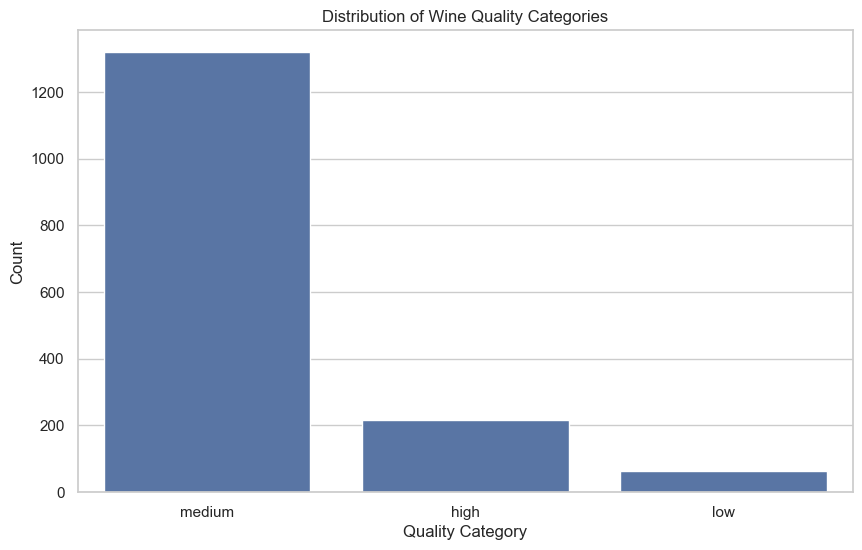

In [11]:
# Create quality categories (low, medium, high)
def quality_to_label(q):
    if q <= 4:
        return "low"
    elif q <= 6:
        return "medium"
    else:
        return "high"

# Add the quality_label column
wine_data["quality_label"] = wine_data["quality"].apply(quality_to_label)




# Check the distribution of quality categories
print("\nDistribution of quality categories:")
print(wine_data["quality_label"].value_counts())
print("\nPercentage distribution:")
print(wine_data["quality_label"].value_counts(normalize=True) * 100)

# Visualize the distribution of quality categories
plt.figure(figsize=(10, 6))
sns.countplot(x='quality_label', data=wine_data)
plt.title('Distribution of Wine Quality Categories')
plt.xlabel('Quality Category')
plt.ylabel('Count')
plt.show()



In [12]:
# Create a mapping dictionary to verify consistency between the two categorization methods
category_mapping = {"low": 0, "medium": 1, "high": 2}


# Create numeric quality categories (0, 1, 2)
def quality_to_number(q):
    if q <= 4:
        return 0
    elif q <= 6:
        return 1
    else:
        return 2
    
wine_data["quality_numeric"] = wine_data["quality"].apply(quality_to_number)

# Check class distribution for the numeric categories
print("\nDistribution of numeric quality categories:")
print(wine_data["quality_numeric"].value_counts())
print("\nPercentage distribution:")
print(wine_data["quality_numeric"].value_counts(normalize=True) * 100)


# Check if the numeric categories match the label categories
wine_data["category_match"] = wine_data.apply(
    lambda row: category_mapping[row["quality_label"]] == row["quality_numeric"], 
    axis=1
)


Distribution of numeric quality categories:
quality_numeric
1    1319
2     217
0      63
Name: count, dtype: int64

Percentage distribution:
quality_numeric
1    82.489056
2    13.570982
0     3.939962
Name: proportion, dtype: float64


These values look right, but let's depict the numeric and label ones side by side graphically to be certain.


Percentage of matching categories: 100.00%
Number of mismatches: 0


<Figure size 1000x600 with 0 Axes>

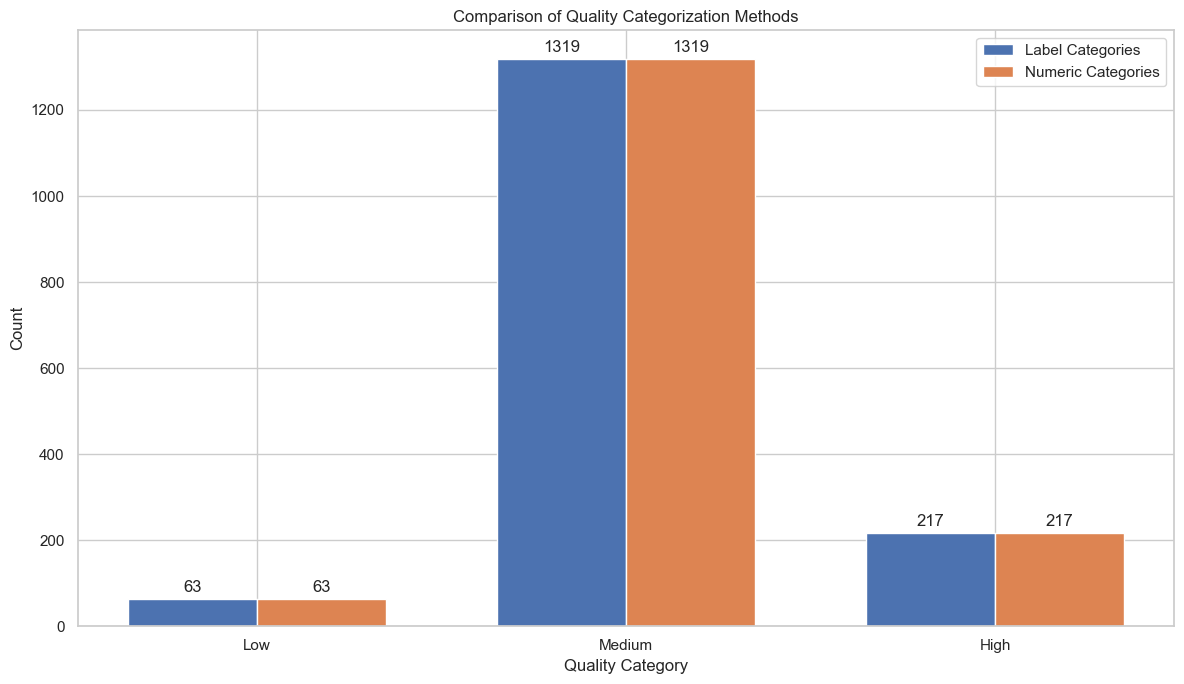

In [13]:


# Display the verification results
match_percentage = (wine_data["category_match"].sum() / len(wine_data)) * 100
print(f"\nPercentage of matching categories: {match_percentage:.2f}%")
print(f"Number of mismatches: {len(wine_data) - wine_data['category_match'].sum()}")

# If there are any mismatches, display them
if not wine_data["category_match"].all():
    print("\nMismatched entries:")
    print(wine_data[~wine_data["category_match"]][["quality", "quality_label", "quality_numeric"]])

# Visualize the distribution of both categorization methods in one chart
plt.figure(figsize=(10, 6))

# Create a DataFrame for plotting
categories = ['Low', 'Medium', 'High'] 
label_counts = [
    wine_data[wine_data['quality_label'] == 'low'].shape[0],
    wine_data[wine_data['quality_label'] == 'medium'].shape[0],
    wine_data[wine_data['quality_label'] == 'high'].shape[0]
]
numeric_counts = [
    wine_data[wine_data['quality_numeric'] == 0].shape[0],
    wine_data[wine_data['quality_numeric'] == 1].shape[0],
    wine_data[wine_data['quality_numeric'] == 2].shape[0]
]

# Set up bar positions
x = np.arange(len(categories))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, label_counts, width, label='Label Categories')
rects2 = ax.bar(x + width/2, numeric_counts, width, label='Numeric Categories')

# Add labels and title
ax.set_xlabel('Quality Category')
ax.set_ylabel('Count')
ax.set_title('Comparison of Quality Categorization Methods')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Add value labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

plt.tight_layout()
plt.show()

# Drop the verification column as it's no longer needed
wine_data.drop("category_match", axis=1, inplace=True)

We have a match! The label and numeric counts match and we are good to begin processing them.

## 3. Feature Selection and Justification

### 3.1 Analyze feature importance

Previously in section 2.2.2, we established Volatile acidity and alcohol ranked highest with correlations of -0.39 and 0.48 respectively. My goal is that with a comparably strong negative and strong positive correlation, the model will be able to successfully predict which of the 3 quality labels a wine belongs in.

I investigated other variables to see 

### 3.2 Define input features and target

## 4. Split the Data into Train and Test

## 5.  Evaluate Model Performance (Choose 2)

## 6. Compare Results 

## 7. Conclusions and Insights